In [1247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re
import nltk

In [1248]:
df = pd.read_csv('analytic/db.csv')

In [1249]:
df.sample(10)

,title,company,location,requirements,description,views_count,reviews_count
44,Junior RPA developer,UAI Labs,Україна,"['· Тільки віддалено', '· Без досвіду', '· Pre...",RPA Developer(UiPath) at UAI Labs\n\nThe RPA D...,187,741
124,IoT developer (LoRaWAN),Quintagroup,Україна (Львів),"['· Office або Remote', '· 3 роки досвіду', '·...",Quintagroup is looking for LoRaWAN engineer to...,6,43
192,Middle Python Developer,Dataforest,"Польща, Україна (Київ)","['· Office або Remote', '· 2 роки досвіду', '·...",Looking for a Middle Python Developer to join ...,27,182
152,Python developer / strong junior,dZENcode,Україна (Харків),"['· Тільки віддалено', '· 1 рік досвіду', '· P...",Необхідні навички:\n- Досвід в IT компанії на ...,86,445
120,Middle Python Developer with Experience in ML/...,SFox GmbH,"Чехія, Польща, Португалія, Словаччина, Україна","['· Product', '· Тільки віддалено', '· 3 роки ...",Looking for middle Python Developer with Exper...,21,111
197,Pyton Developer 4+ years exp,Addstrategix,Україна,"['· Тільки віддалено', '· 5 років досвіду']",Responsibilities:\n● Design and develop REST A...,7,44
88,Senior Python Engineer (only in Poland),Adaptiq,Польща,"['· Product', '· Тільки віддалено', '· 5 років...",We are a pioneer in the field of Enhanced Sens...,0,10
36,Trainee Python/Django Developer,Netframe,Україна (Київ),"['· Тільки віддалено', '· Без досвіду', '· Upp...",We are looking for a dedicated and motivated i...,187,873
186,Software Engineer with VoIP experience,Respeecher,Україна (Київ),"['· Product', '· Office або Remote', '· 5 рокі...",We are looking for a Senior Software Engineer ...,4,64
163,Senior Software Engineer (Python),SPS Commerce,Україна,"['· Product', '· Гібридна робота', '· 5 років ...",What We Expect of You:\nWe are adding to our e...,1,24


# Position correction

In [1250]:
df.title.unique()

array(['Middle Python Developer', 'Junior Python Developer',
       'Automation QA Middle (Python) Engineer',
       'Senior Django Developer', 'QA Automation Engineer',
       'Middle/ Middle+ Back-end Python Developer', 'Python Engineer',
       'Junior Python Verification Engineer',
       'Senior Python Developer_Competency Lead',
       'Python/Django developer',
       'Middle Python Software Engineer (Prom.ua)',
       'Back-End Python (Django) Developer',
       'Senior Python Backend Engineer', 'Senior Python Engineer',
       'Data and Machine Learning Engineer (Python)',
       'Python Engineer with AI (Computer Vision)', 'Python Developer',
       'AI Developer', 'Senior Python Developer',
       'Bot Developer in the Crypto Sector (Python / Zennoposter)',
       'Python Developer (Разработчик бота у криптосередовищі)',
       'Python Developer (Junior)',
       'Senior Python (Computer Vision) Engineer/Poland or Romania',
       'Django Developer', 'Python/Django Developer

In [1251]:
def word_search(words, key_words):
    for word in words.split():
        if word.lower() in key_words:
            return True
    return False

def simplify_decorator(field_and_keywords):
    def decorator(func):
        def wrapper(income):
            income_lower = income.lower()
            for output, key_words in field_and_keywords.items():
                if word_search(income_lower, key_words):
                    return output
            return 'other'
        return wrapper
    return decorator

In [1252]:
positions = {
    'data_scientist': ['data', 'vision', 'ai', 'ші', 'інтелект', 'llm', 'nlp', 'timeseries', 'ml', 'cv', 'ml/cv'],
    'full_stack': ['full stack', 'fullstack', 'full-stack'],
    
    'team_lead': ['team', 'team lead', 'lead', 'senior/lead'],
    'middle': ['middle'],
    'senior': ['senior'],
    'junior': ['junior', 'trainee']
}

@simplify_decorator(positions)
def position_simplify(title):
    return title

df['position'] = df['title'].apply(position_simplify)

In [1253]:
df[['title', 'position']]

,title,position
0,Middle Python Developer,middle
1,Junior Python Developer,junior
2,Automation QA Middle (Python) Engineer,middle
3,Senior Django Developer,senior
4,QA Automation Engineer,other
...,...,...
193,Tech Lead Data Engineer (Python),data_scientist
194,Junior Python Developer,junior
195,Python developer with Cloud and DevOps experience,other
196,Senior - Regular Python Developer ( EST workin...,senior


In [1254]:
df.position.unique()

array(['middle', 'junior', 'senior', 'other', 'team_lead',
       'data_scientist', 'full_stack'], dtype=object)

The "Other" category encompasses positions that lack a specified rank or possess unconventional titles. This includes roles that do not fit into the predefined categories of Junior, Middle, Senior, or other specialized positions. It serves as a catch-all for positions that may have unique or unspecified qualifications, making them distinct from the more clearly defined roles in the dataset.

In [1255]:
df[df['position'] == 'other']

,title,company,location,requirements,description,views_count,reviews_count,position
4,QA Automation Engineer,PLVision,"Україна (Київ, Львів, Одеса, Харків)","['· Office або Remote', '· 3 роки досвіду', '·...",We invite a Quality Assurance (QA) Automation ...,4,32,other
5,Middle/ Middle+ Back-end Python Developer,ARENA CS,Україна,"['· Product', '· Тільки віддалено', '· 3 роки ...","Gradus – це продуктова компанія, а це означає:...",19,55,other
6,Python Engineer,Lemberg Solutions,"Релокейт, Україна (Львів)","['· Гібридна робота', '· 3 роки досвіду', '· I...","Lemberg Solutions is, above all, a group of pa...",9,32,other
9,Python/Django developer,Right Link,Україна,"['· Тільки віддалено', '· 1 рік досвіду', '· U...",Tech requirements\n• Python/Django experience\...,129,325,other
11,Back-End Python (Django) Developer,StrimkoSoft,Україна,"['· Тільки віддалено', '· 5 років досвіду', '·...",We are seeking an experienced Python Developer...,38,104,other
...,...,...,...,...,...,...,...,...
187,Python Engineer (OCR and Document Processing),PLANEKS,Україна,"['· Тільки віддалено', '· 2 роки досвіду', '· ...",Let’s start with what PLANEKS offers:\n\n0. Fa...,20,170,other
189,Large Language Model (LLM) Engineer,BVG,"Болгарія, Іспанія, Україна","['· Тільки віддалено', '· 3 роки досвіду', '· ...",We are seeking a dedicated Large Language Mode...,3,28,other
191,Python Developer,OCTY,Естонія,"['· Тільки віддалено', '· 1 рік досвіду', '· U...",About us:\nOur company works with startups - d...,121,408,other
195,Python developer with Cloud and DevOps experience,Luxoft,"Україна (Дніпро, Київ, Одеса)","['· Office або Remote', '· 2 роки досвіду', '·...",Project Description:\nOne of the world's large...,12,67,other


# Position analyze

From the table, it's evident that there is a notable surge in interest from individuals applying for Junior and Middle positions. Interestingly, the data suggests a pattern where, on average, every Junior applicant tends to submit their CV for approximately every fourth vacancy. This observation raises the possibility that either the job requirements for these positions are relatively standard, or there might be instances of widespread application spamming within these categories.

In [1256]:
review_stat = df.groupby('position').sum()[['views_count', 'reviews_count']]
review_stat['proportion'] = (review_stat['views_count'] / review_stat['reviews_count'] * 100).__round__(1)
review_stat

,views_count,reviews_count,proportion
position,,,
data_scientist,549,2712,20.2
full_stack,15,261,5.7
junior,1441,5724,25.2
middle,840,3386,24.8
other,2478,10742,23.1
senior,465,2587,18.0
team_lead,48,360,13.3


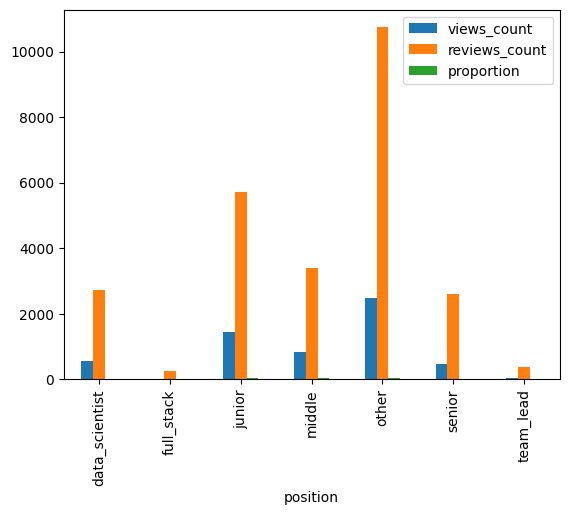

In [1257]:
review_stat.plot.bar();

At present moment the most popular vacansy is required scraping skill

In [1258]:
df.sort_values(by='views_count', ascending=False)[['title', 'views_count', 'reviews_count', 'requirements']].head(1)

,title,views_count,reviews_count,requirements
70,Data Scrap Specialist (Python),242,715,"['· Product', '· Тільки віддалено', '· Без дос..."


The table reveals that the highest number of job offers corresponds to the roles of Senior and Data Scientist, with the "Other" category excluded. Additionally, a notable pattern emerges where a significant number of companies seek candidates for both Senior and Middle positions, surpassing other combinations. This trend is attributed to instances where a single company has multiple open positions for different experience levels within its workforce requirements.

In [1259]:
position_stat = df.groupby('position').nunique()[['title', 'company']]
position_stat

,title,company
position,,
data_scientist,20,18
full_stack,4,4
junior,8,11
middle,14,23
other,55,61
senior,29,32
team_lead,10,10


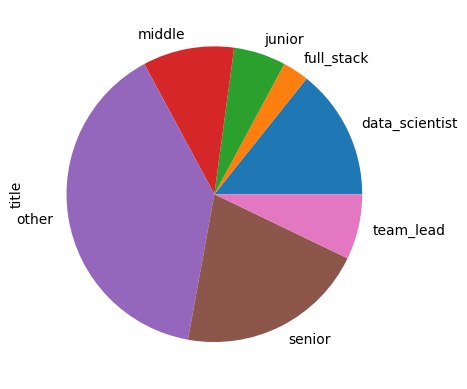

In [1260]:
position_stat.title.plot.pie();

# Requirements correction

In [1261]:
df.requirements.unique()

array(["['· Тільки віддалено', '· 2 роки досвіду', '· Upper-Intermediate']",
       "['· Product', '· Гібридна робота', '· 1 рік досвіду', '· Pre-Intermediate']",
       "['· Office або Remote', '· 3 роки досвіду', '· Upper-Intermediate']",
       "['· Product', '· Тільки віддалено', '· 3 роки досвіду']",
       "['· Office або Remote', '· 3 роки досвіду', '· Intermediate']",
       "['· Product', '· Тільки віддалено', '· 3 роки досвіду', '· Upper-Intermediate']",
       "['· Гібридна робота', '· 3 роки досвіду', '· Intermediate']",
       "['· Office або Remote', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Тільки віддалено', '· 1 рік досвіду', '· Upper-Intermediate']",
       "['· Product', '· Office або Remote', '· 3 роки досвіду']",
       "['· Тільки віддалено', '· 5 років досвіду', '· Upper-Intermediate']",
       "['· Product', '· Office або Remote', '· 5 років досвіду', '· Intermediate']",
       "['· Product', '· Office або Remote', '· 5 років досвіду', '· Upper-

In [1262]:
def phrase_search(phrases, text):
    for phrase in phrases:
        if phrase.lower() in text.lower():
            return True
    return False

def simplify_decorator(field_and_keywords):
    def decorator(func):
        def wrapper(income):
            income_lower = income.lower()
            for output, key_phrases in field_and_keywords.items():
                if phrase_search(key_phrases, income_lower):
                    return output
            return np.nan
        return wrapper
    return decorator

type = {
    'only_remote': ['Тільки віддалено'],
    'office_or_remote': ['Office або Remote'],
    'remote': ['Remote'],
    'office': ['Office'],
    'only_office': ['Тільки офіс'],
    'gibryd': ['Гібридна робота']
}

experience = {
    5: ['5'],
    3: ['3'],
    2: ['2'],
    1: ['1'],
    0: ['Без досвіду']
}

english = {
    1: ['Pre-Intermediate'],
    3: ['Upper-Intermediate'],
    2: ['Intermediate'],
    4: ['Advanced/Fluent']
}

@simplify_decorator(type)
def type_simplify(title):
    return title

@simplify_decorator(experience)
def experience_simplify(title):
    return title

@simplify_decorator(english)
def english_simplify(title):
    return title

df['type'] = df['requirements'].apply(type_simplify)
df['experience'] = df['requirements'].apply(experience_simplify)
df['english'] = df['requirements'].apply(english_simplify)

# Requirements analytic

In [1263]:
cleaned_df = df[['views_count','reviews_count','position','type','experience','english']]
cleaned_df

,views_count,reviews_count,position,type,experience,english
0,14,74,middle,only_remote,2,3.0
1,46,213,junior,gibryd,1,1.0
2,7,28,middle,office_or_remote,3,3.0
3,22,55,senior,only_remote,3,NaN
4,4,32,other,office_or_remote,3,2.0
...,...,...,...,...,...,...
193,16,70,data_scientist,office_or_remote,3,2.0
194,121,471,junior,only_remote,2,1.0
195,12,67,other,office_or_remote,2,3.0
196,14,91,senior,office_or_remote,3,3.0


When a job requires less proficiency in English, it tends to attract a higher number of candidates applying for that position.

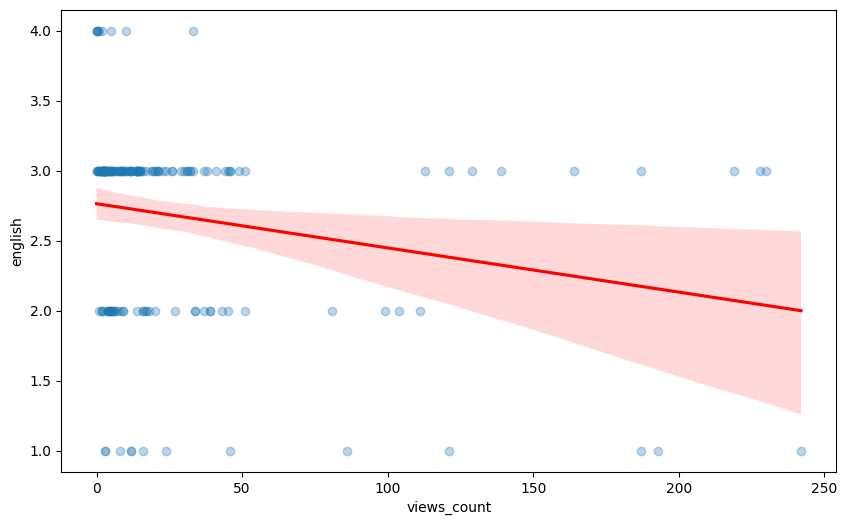

In [1264]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='views_count', y='english', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.show()

In 75% situation good English is not required for Juniors and mean level is around Intermediate or less

In [1265]:
cleaned_df.groupby('position')['english'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
data_scientist,18.0,2.7,0.8,1.0,2.0,3.0,3.0,4.0
full_stack,4.0,2.8,0.5,2.0,2.8,3.0,3.0,3.0
junior,9.0,1.8,0.8,1.0,1.0,2.0,2.0,3.0
middle,22.0,2.6,0.7,1.0,2.0,3.0,3.0,4.0
other,67.0,2.7,0.6,1.0,2.0,3.0,3.0,4.0
senior,46.0,2.8,0.5,1.0,3.0,3.0,3.0,4.0
team_lead,10.0,2.9,0.9,1.0,3.0,3.0,3.0,4.0


In [1266]:
cleaned_df.groupby('position')['experience'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
position,,,,,,,,
data_scientist,21.0,3.4,2.0,0.0,2.0,5.0,5.0,5.0
full_stack,5.0,4.2,1.1,3.0,3.0,5.0,5.0,5.0
junior,11.0,1.0,0.9,0.0,0.5,1.0,1.0,3.0
middle,25.0,2.6,0.8,1.0,2.0,3.0,3.0,5.0
other,77.0,3.0,1.3,0.0,2.0,3.0,3.0,5.0
senior,49.0,4.3,1.0,2.0,3.0,5.0,5.0,5.0
team_lead,10.0,4.8,0.6,3.0,5.0,5.0,5.0,5.0


Surprise! To find the job the best position is Senior

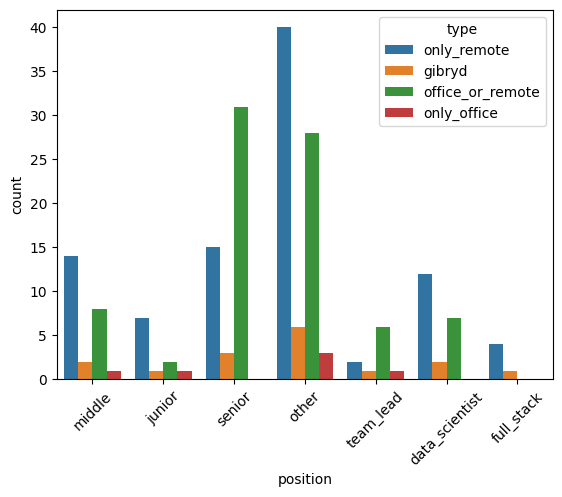

In [1267]:
sns.countplot(data=cleaned_df, x='position', hue='type')
plt.xticks(rotation=45);

# Description analytic

In [1268]:
import re

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    return text


def utils_preprocess_text(text, flg_stemm=True, flg_lemm=True, lst_stopwords=None):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    lst_text = text.split()
    lst_text = [word for word in lst_text if word not in lst_stopwords]
    if flg_stemm:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
    if flg_lemm:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
    text = " ".join(lst_text)
    return text


def count_words(text):
    text = text.split()
    text = [word.lower() for word in text]
    text = set(text)
    return text

In [1269]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stopwords_en = stopwords.words('english')


def find_most_common_words(text):
    text = remove_punctuation(text)
    text = utils_preprocess_text(text, lst_stopwords=stopwords_en)
    text = count_words(text)
    return text
    

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [1270]:
df.description[7]

"We invite a skilled Firmware Python Verification Engineer with up to 2 years of experience in Quality Assurance and Python programming language to join PLVision. In this role, you will ensure the quality and reliability of our customers' products. You will work closely with hardware engineers to ensure seamless integration between firmware and networking equipment.\n\nAt PLVision, we offer numerous opportunities to secure your career development while working in a thriving Ukrainian company with an in-demand specialization. We work with the latest technologies and contribute to open source, collaborating with professionals from Microsoft, Intel, Cisco, NVIDIA, Meta and more. If you are seeking a long-term project in a future-proof technology domain, apply for this vacancy and become part of our expert team.\n\nAbout PLVision\n\nWe are a software product development company specializing in computer networking and embedded systems. PLVision has offices in Krakow, Poland, and in Ukraine:

In [1271]:
find_most_common_words(df.description[7])

{'2',
 '2007',
 'advoc',
 'agilescrum',
 'ambiti',
 'analysi',
 'analyt',
 'appli',
 'assur',
 'autom',
 'bachelor',
 'basic',
 'becom',
 'best',
 'career',
 'case',
 'ci',
 'cisco',
 'close',
 'collabor',
 'commun',
 'compani',
 'comput',
 'continu',
 'contribut',
 'cooper',
 'countri',
 'current',
 'custom',
 'debug',
 'degre',
 'design',
 'develop',
 'domain',
 'eg',
 'embed',
 'emphasi',
 'emul',
 'engin',
 'english',
 'ensur',
 'environ',
 'equip',
 'eu',
 'exist',
 'experi',
 'expert',
 'firmwar',
 'found',
 'futureproof',
 'gerrit',
 'good',
 'hardwar',
 'help',
 'higher',
 'identifi',
 'implement',
 'indemand',
 'industri',
 'innov',
 'integr',
 'intel',
 'intermedi',
 'intern',
 'invit',
 'israel',
 'jenkin',
 'join',
 'kharkiv',
 'knowledg',
 'krakow',
 'kyiv',
 'languag',
 'latest',
 'launch',
 'leader',
 'level',
 'linux',
 'longterm',
 'lviv',
 'manag',
 'meta',
 'methodolog',
 'microsoft',
 'must',
 'network',
 'new',
 'numer',
 'nvidia',
 'objectori',
 'odesa',
 'offer',

In [1272]:
technologies_for_python_developer = [
    "flask",
    "linux",
    "mysql",
    "git",
    "postgresql",
    "python",
    "rest",
    "nosql",
    "django",
    "kubernet",
    "sql",
    "http",
    "english",
    "flask",
    "fastapi",
    "sqlalchemy",
    "pandas",
    "numpy",
    "matplotlib",
    "scipy",
    "tensorflow",
    "requests",
    "beautifulsoup",
    "scrapy",
    "flask-restful",
    "pytest",
    "asyncio",
    "jupyter",
    "docker",
    "numpy",
    "scikit-learn",
    "keras",
    "pytorch",
    "dash",
    "streamlit",
    "celery",
    "redis",
    "sqlalchemy",
    "graphql",
    "pytest",
    "selenium",
    "drf",
    "alembic",
    "pytest",
    "unittest",
    "pytorch",
    "openCV",
    "dash",
    "streamlit",
]

technologies_for_python_developer = set(technologies_for_python_developer)

In [1273]:
skills_counter = {skill: 0 for skill in technologies_for_python_developer}

In [1274]:
def skills_count(text):
    global skills_counter
    for skill in skills_counter:
        if skill in text:
            skills_counter[skill] += 1
        

In [1275]:
_ = df.description.apply(skills_count)

In [1276]:
skills_counter

{'http': 12,
 'flask-restful': 0,
 'streamlit': 0,
 'openCV': 0,
 'kubernet': 2,
 'tensorflow': 0,
 'scikit-learn': 3,
 'requests': 5,
 'jupyter': 0,
 'rest': 37,
 'celery': 7,
 'asyncio': 7,
 'docker': 6,
 'matplotlib': 0,
 'linux': 3,
 'keras': 0,
 'numpy': 2,
 'mysql': 1,
 'beautifulsoup': 0,
 'redis': 0,
 'pandas': 3,
 'fastapi': 1,
 'selenium': 3,
 'python': 8,
 'flask': 1,
 'nosql': 0,
 'scrapy': 0,
 'unittest': 1,
 'postgresql': 1,
 'english': 0,
 'sqlalchemy': 2,
 'dash': 2,
 'scipy': 1,
 'git': 22,
 'django': 2,
 'pytorch': 0,
 'graphql': 0,
 'pytest': 3,
 'alembic': 0,
 'sql': 7,
 'drf': 0}

In [1277]:
skills_counter = {k: v for k, v in skills_counter.items() if v != 0}
skills_counter = dict(sorted(skills_counter.items(), key=lambda item: item[1], reverse=True))
skills_counter

{'rest': 37,
 'git': 22,
 'http': 12,
 'python': 8,
 'celery': 7,
 'asyncio': 7,
 'sql': 7,
 'docker': 6,
 'requests': 5,
 'scikit-learn': 3,
 'linux': 3,
 'pandas': 3,
 'selenium': 3,
 'pytest': 3,
 'kubernet': 2,
 'numpy': 2,
 'sqlalchemy': 2,
 'dash': 2,
 'django': 2,
 'mysql': 1,
 'fastapi': 1,
 'flask': 1,
 'unittest': 1,
 'postgresql': 1,
 'scipy': 1}

The most popular technology for Python developer is REST and Git

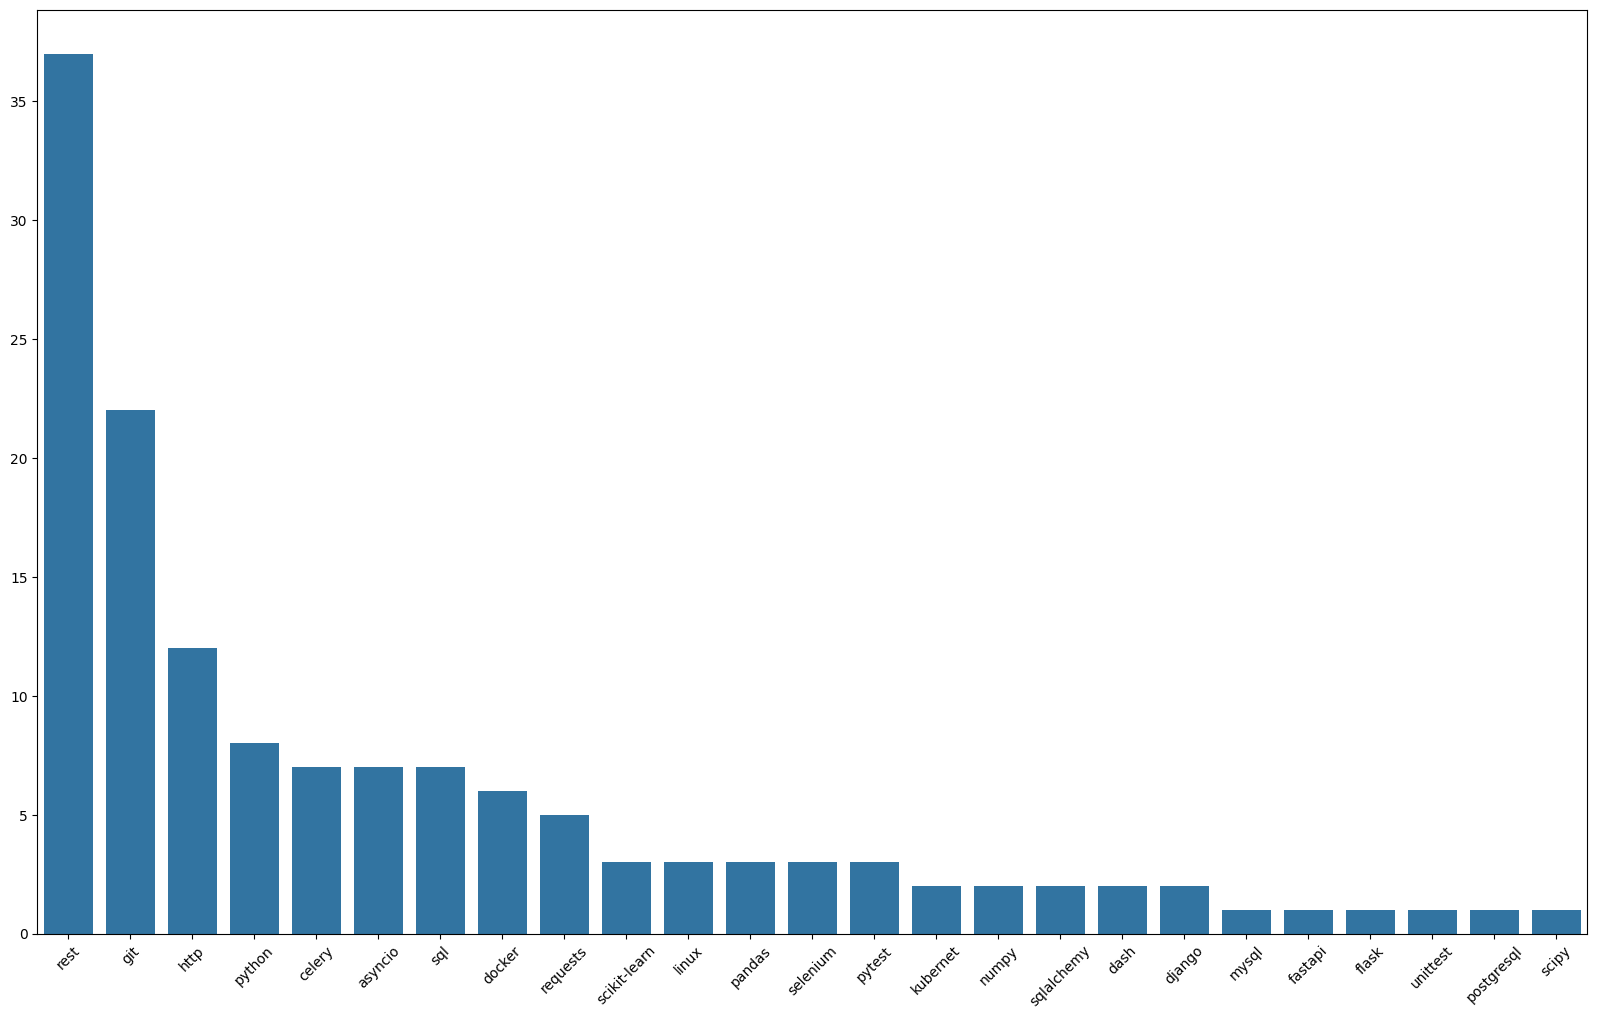

In [1278]:
plt.figure(figsize=(20,12))
sns.barplot(skills_counter)
plt.xticks(rotation=45)

plt.show()